## Hypothesis
To predict the incentive level requested to program washer and drier after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [35]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       4       5       5       6       7      56 


  1   2   3   4   5   6   7 
 47  34  64 137  41 160 123 

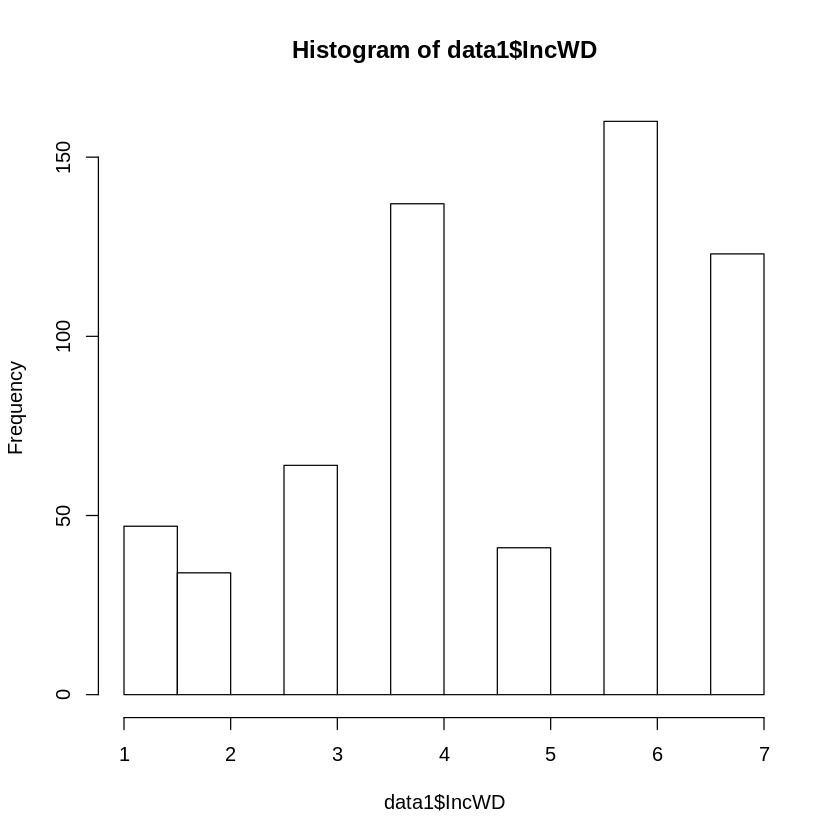

In [36]:
summary(data1$IncWD)
table(data1$IncWD)
hist(data1$IncWD)

In [37]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [38]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 102
[1] 430 102


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.0     5.0     4.7     6.0     7.0 


  1   2   3   4   5   6   7 
 30  22  49 104  26 121  78 

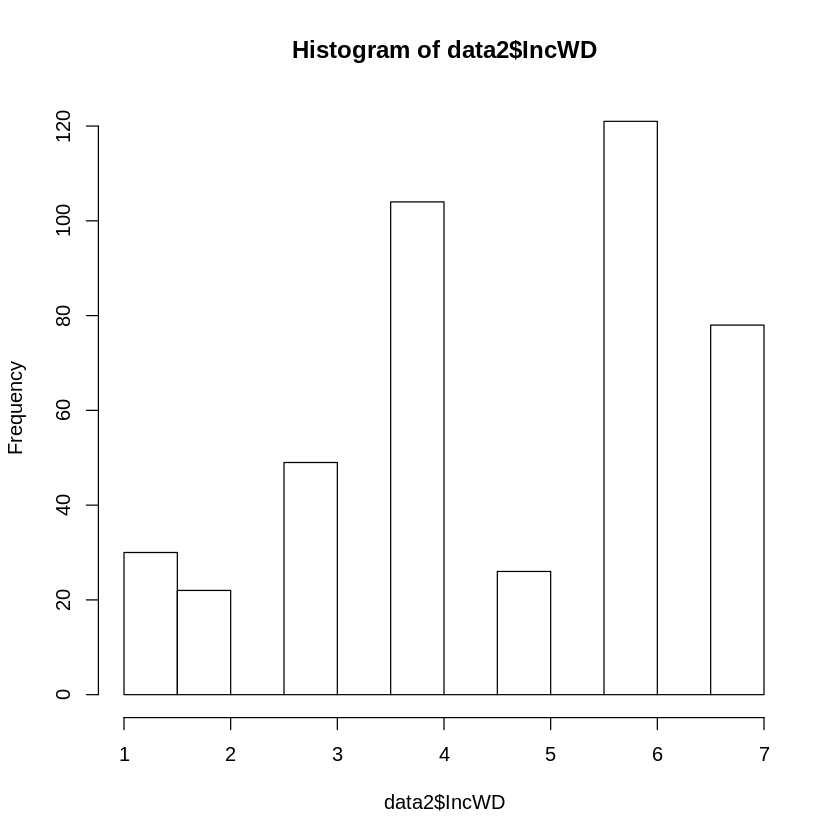

In [39]:
summary(data2$IncWD)
table(data2$IncWD)
hist(data2$IncWD)

In [40]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "IncWD"      "Income"     "Latitude"   "MC"         "MC1"       
 [71] "MC2"        "MC3"        "MC4"        "MC5"        "MCBill"    
 [76] "OwnRent"    "PBC1"       "PBC2"       "PBC3R"      "PBC4"      
 [81] "PBC5"       "Political"  "RewardForm" "SN"         "SN1"       
 [86] "SN2"        "SN3"        "SN4"        "Sqft"       "SqftCate"  
 [91] "State"      "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"  
 [96] "Summer_avg" "Trust1"     "Trust2"     "Trust3"     "Trust4"    
[101] "Winter_avg" "X.9to5"

In [41]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"HabitG",
"ConvB1")

In [42]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "IncWD"      "Income"     "Latitude"   "MC"         "MC1"       
 [71] "MC2"        "MC3"        "MC4"        "MC5"        "MCBill"    
 [76] "OwnRent"    "PBC1"       "PBC2"       "PBC3R"      "PBC4"      
 [81] "PBC5"       "Political"  "RewardForm" "SN"         "SN1"       
 [86] "SN2"        "SN3"        "SN4"        "Sqft"       "SqftCate"  
 [91] "State"      "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"  
 [96] "Summer_avg" "Trust1"     "Trust2"     "Trust3"     "Trust4"    
[101] "Winter_avg" "X.9to5"

[1] "Age"        "ComfNS"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitG"     "HouseholdS" "Income"    
[11] "MC"         "OwnRent"    "Political"  "SqftCate"   "Trust"

In [43]:
data1 <- data2[, which(names(data2) %in% c("IncWD",IVS))];
sort(names(data1))

[1] "Age"        "ComfNS"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitG"     "HouseholdS" "IncWD"     
[11] "Income"     "MC"         "OwnRent"    "Political"  "SqftCate"

In [44]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [45]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [46]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncWD"      "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "MC"         "ComfNS"     "HabitG"

In [47]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [48]:
hiCor(data2,.7)

<0 x 0 matrix>

In [50]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:16];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


ERROR: Error in prcomp(data2, retx = F, scale = T)$rotation[, 1:16]: subscript out of bounds


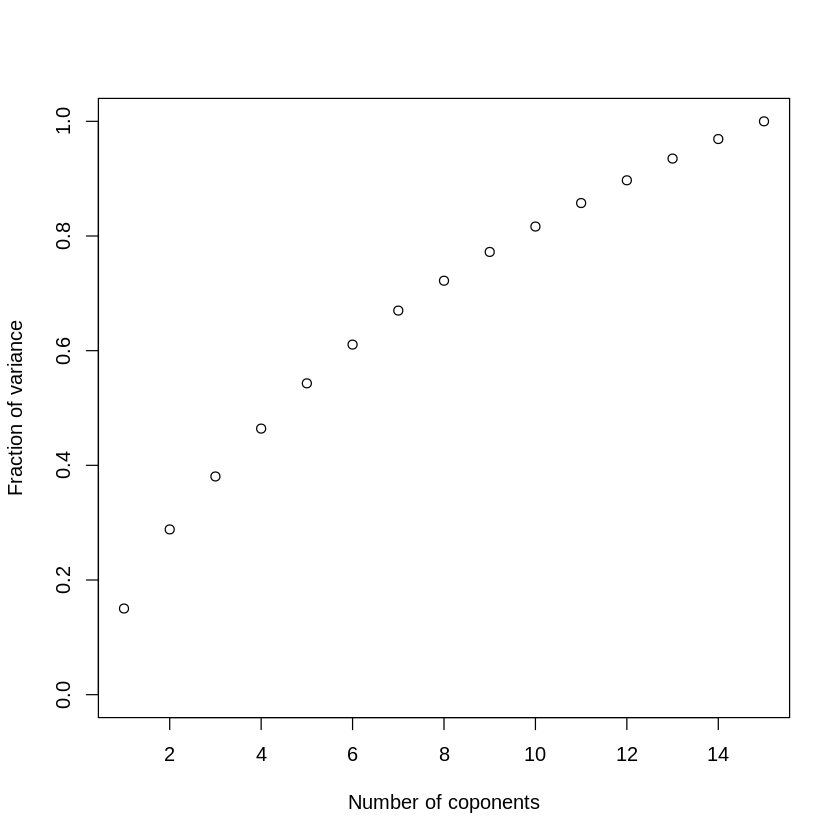

In [51]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [52]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [53]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,6,0.33
MC,13,0.28
ConvB1,2,0.27
OwnRent,5,0.27
EnergyC,12,0.23
Income,10,0.22
Age,3,0.21
HabitG,15,0.19
HouseholdS,7,0.18
Gender,4,0.13
Political,8,0.13


In [54]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [55]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'EnergyC', 'MC', 'ConvB1', 'HabitG')

In [56]:
fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [57]:
table(data2[,"IncWD"])


  1   2   3   4   5   6   7 
 30  22  49 104  26 121  78 

In [63]:
mod = lm(fmla,data=data2,subs=data2$Gender==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Gender == 1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.817 -1.216  0.135  1.256  3.387 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9316     1.3642    2.88  0.00445 ** 
Age           0.0419     0.0124    3.39  0.00086 ***
Gender            NA         NA      NA       NA    
OwnRent       0.2212     0.2605    0.85  0.39696    
SqftCate      0.0563     0.1368    0.41  0.68102    
HouseholdS    0.1411     0.1135    1.24  0.21544    
Political     0.0325     0.1706    0.19  0.84923    
Ethnic       -0.3039     0.4059   -0.75  0.45508    
Income        0.0122     0.0743    0.16  0.86938    
Educ         -0.1096     0.1207   -0.91  0.36520    
EnergyC      -0.1136     0.0890   -1.28  0.20360    
MC           -0.1187     0.1263   -0.94  0.34850    
ConvB1        0.0602     0.1107    0.54  0.58740    
HabitG       -0.0264     0.1184   -0.22  0.82367  

In [24]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-4.630 -1.105  0.094  1.188  3.556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6198     3.4430    0.18  0.85737    
Age           0.0477     0.0131    3.63  0.00038 ***
Gender        0.3013     0.2753    1.09  0.27525    
OwnRent       0.1266     0.2851    0.44  0.65761    
SqftCate      0.0673     0.1521    0.44  0.65871    
HouseholdS    0.0743     0.1120    0.66  0.50771    
Political     0.1688     0.1662    1.02  0.31133    
Ethnic       -0.8877     0.3489   -2.54  0.01187 *  
Income        0.0274     0.0745    0.37  0.71331    
Educ          0.0976     0.1264    0.77  0.44119    
Latitude     -0.0206     0.0436   -0.47  0.63648    
EnergyC      -0.1340     0.0985   -1.36  0.17549    
MC           -0.2764     0.1487   -1.86  0.06499 .  
ComfNS        0.1962     0.0942    2.08  0.03890 *  
HabitC        0.0480     0.1070    0

In [25]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-4.685 -1.159  0.183  1.302  3.191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   8.2163     2.5010    3.29   0.0012 **
Age           0.0186     0.0106    1.76   0.0800 . 
Gender        0.1019     0.2317    0.44   0.6604   
OwnRent       0.1491     0.2582    0.58   0.5641   
SqftCate      0.1770     0.1226    1.44   0.1500   
HouseholdS    0.0157     0.1051    0.15   0.8813   
Political    -0.2172     0.1361   -1.60   0.1119   
Ethnic        0.7368     0.3654    2.02   0.0449 * 
Income       -0.1042     0.0707   -1.47   0.1417   
Educ         -0.1128     0.1050   -1.07   0.2839   
Latitude     -0.0967     0.0486   -1.99   0.0477 * 
EnergyC      -0.0527     0.0823   -0.64   0.5220   
MC           -0.1069     0.1101   -0.97   0.3330   
ComfNS        0.1613     0.0806    2.00   0.0467 * 
HabitC       -0.0889     0.0854   -1.04   0.2988   

In [26]:
#17 states with highest average temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.679 -1.208  0.279  1.215  3.218 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.91522    1.57574    2.48  0.01372 *  
Age          0.04619    0.01198    3.86  0.00015 ***
Gender       0.00152    0.24384    0.01  0.99504    
OwnRent     -0.03187    0.26140   -0.12  0.90307    
SqftCate     0.13382    0.13828    0.97  0.33425    
HouseholdS  -0.04323    0.10225   -0.42  0.67290    
Political   -0.02081    0.14628   -0.14  0.88703    
Ethnic      -0.44092    0.30923   -1.43  0.15533    
Income      -0.05660    0.06888   -0.82  0.41213    
Educ         0.05365    0.11208    0.48  0.63264    
Latitude    -0.01416    0.03469   -0.41  0.68348    
EnergyC     -0.02663    0.08214   -0.32  0.74606    
MC          -0.17815    0.12756   -1.40  0.16394    
ComfNS       0.15413    0.08892    1.73  

In [27]:
#17 middle states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.642 -1.063  0.061  1.143  2.928 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.20532    5.91892   -1.05    0.298  
Age         -0.00224    0.01934   -0.12    0.908  
Gender       0.81446    0.41649    1.96    0.055 .
OwnRent      0.36645    0.43491    0.84    0.402  
SqftCate     0.05333    0.21714    0.25    0.807  
HouseholdS   0.17409    0.18221    0.96    0.343  
Political   -0.13258    0.27965   -0.47    0.637  
Ethnic       0.66978    0.71512    0.94    0.352  
Income      -0.02673    0.12218   -0.22    0.827  
Educ         0.05264    0.21365    0.25    0.806  
Latitude     0.31276    0.15465    2.02    0.047 *
EnergyC      0.03584    0.19139    0.19    0.852  
MC          -0.42124    0.19694   -2.14    0.036 *
ComfNS       0.10587    0.14099    0.75    0.455  
HabitC      -0.240

In [28]:
#bottom 17 states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.279 -1.017  0.184  1.186  3.335 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.82264    3.62267    0.50   0.6161   
Age          0.02366    0.01653    1.43   0.1558   
Gender       0.13014    0.37866    0.34   0.7319   
OwnRent     -0.00594    0.41214   -0.01   0.9885   
SqftCate     0.24501    0.19180    1.28   0.2047   
HouseholdS   0.14017    0.17532    0.80   0.4261   
Political   -0.10372    0.21886   -0.47   0.6367   
Ethnic       1.14030    0.68531    1.66   0.0995 . 
Income      -0.04698    0.12624   -0.37   0.7106   
Educ        -0.09658    0.16171   -0.60   0.5518   
Latitude    -0.03741    0.05793   -0.65   0.5201   
EnergyC     -0.20687    0.13453   -1.54   0.1275   
MC           0.04758    0.18029    0.26   0.7925   
ComfNS       0.34417    0.12085    2.85   0.0054 **
Hab

In [29]:
#top 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-3.494 -1.104  0.264  1.229  2.987 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.6170     3.9469    0.16    0.876  
Age           0.0307     0.0176    1.74    0.086 .
Gender        0.4614     0.4245    1.09    0.281  
OwnRent      -0.2078     0.4591   -0.45    0.652  
SqftCate      0.4643     0.2318    2.00    0.049 *
HouseholdS   -0.1959     0.1962   -1.00    0.322  
Political     0.0226     0.2480    0.09    0.928  
Ethnic        1.2946     0.7882    1.64    0.105  
Income       -0.0476     0.1542   -0.31    0.759  
Educ         -0.2731     0.1977   -1.38    0.172  
Latitude      0.0130     0.0655    0.20    0.843  
EnergyC      -0.1077     0.1511   -0.71    0.479  
MC            0.1645     0.2027    0.81    0.420  
ComfNS        0.3443     0.1368    2.52    0.014 *
HabitC        0.08

In [30]:
#middle 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.973 -1.245  0.204  1.203  3.531 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   8.9201     3.1604    2.82   0.0056 **
Age           0.0168     0.0161    1.04   0.3011   
Gender        0.0697     0.3339    0.21   0.8349   
OwnRent       0.4123     0.3716    1.11   0.2695   
SqftCate      0.0776     0.1728    0.45   0.6544   
HouseholdS    0.1710     0.1501    1.14   0.2567   
Political    -0.3740     0.1932   -1.94   0.0553 . 
Ethnic        0.6817     0.4947    1.38   0.1708   
Income       -0.2401     0.0943   -2.55   0.0122 * 
Educ          0.0623     0.1491    0.42   0.6771   
Latitude     -0.0925     0.0547   -1.69   0.0936 . 
EnergyC      -0.0708     0.1124   -0.63   0.5302   
MC           -0.2045     0.1588   -1.29   0.2002   
ComfNS        0.1398     0.1218    1.15   0.2533   
Hab

In [31]:
#bottom 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.575 -1.128  0.212  1.212  3.533 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.49722    2.41162    1.04  0.30171    
Age          0.04222    0.01200    3.52  0.00054 ***
Gender       0.23773    0.25269    0.94  0.34797    
OwnRent      0.02504    0.27191    0.09  0.92671    
SqftCate     0.08166    0.13968    0.58  0.55947    
HouseholdS  -0.00351    0.10469   -0.03  0.97326    
Political    0.15253    0.15249    1.00  0.31843    
Ethnic      -0.70544    0.33836   -2.08  0.03838 *  
Income       0.06439    0.07149    0.90  0.36885    
Educ         0.01605    0.11807    0.14  0.89203    
Latitude     0.00742    0.03975    0.19  0.85205    
EnergyC     -0.06544    0.09366   -0.70  0.48561    
MC          -0.26945    0.13571   -1.99  0.04848 *  
ComfNS       0.18045    0.08766    2.06  

In [32]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,62.546,62.546,21.5961,6.2e-06
Gender,1,0.472,0.472,0.1629,6.9e-01
OwnRent,1,0.145,0.145,0.0502,8.2e-01
SqftCate,1,4.801,4.801,1.6576,2.0e-01
HouseholdS,1,0.188,0.188,0.0648,8.0e-01
Political,1,1.677,1.677,0.5790,4.5e-01
Ethnic,1,7.383,7.383,2.5493,1.1e-01
Income,1,1.705,1.705,0.5886,4.4e-01
Educ,1,0.536,0.536,0.1851,6.7e-01
Latitude,1,0.032,0.032,0.0109,9.2e-01


In [33]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
     IncWD        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.98       0.98       0.91       0.99       1.00       0.99       0.95 
    Ethnic     Income       Educ   Latitude    EnergyC         MC     ComfNS 
      0.98       0.98       0.97       0.36       0.48       0.74       0.94 
      Atti    SubNorm         SN     HabitG     HabitC Summer_avg Winter_avg 
      0.38       0.77       0.94       0.87       0.91       0.21       0.18 

Loadings:
           Factor1 Factor2
Latitude    0.80          
Summer_avg -0.89          
Winter_avg  0.90          
EnergyC             0.72  
Atti                0.79  
IncWD                     
Age                       
Gender                    
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          

In [34]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)

ERROR: Error in eval(expr, envir, enclos): object 'IncHomeS' not found


In [ ]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [ ]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

In [ ]:
library(mgcv)


In [ ]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)


In [ ]:
plot(mGam)

In [ ]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)


In [ ]:
anova(mod1)

In [ ]:
drop1(mod1)

In [ ]:
library(bnlearn)

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [ ]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)

In [ ]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)